In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
data = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df = pd.DataFrame(data)

In [5]:
df.drop([0,0], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
1,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
2,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
3,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01
4,Xgg7dIKys9E,Interview with the Director of AI Research @ N...,"Aug 5, 2020",329,118,15,590,11,161,2.973,7.425,9.55,0:04:37,13429,1034.3945,150,39.920,210876,3.38


In [6]:
df.columns = ['Video', 'Video title', 'Video publish time', 'Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost',
       'Subscribers gained', 'RPM (USD)', 'CPM (USD)',
       'Average percentage viewed (%)', 'Average view duration',
       'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions',
       'Impressions click-through rate (%)']

In [7]:
df2 = df.drop(['Video', 'Video title', 'Video publish time'], axis=1)
df2

,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
0,907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
1,412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
2,402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
3,375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01
4,329,118,15,590,11,161,2.973,7.425,9.55,0:04:37,13429,1034.3945,150,39.920,210876,3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3,5,1,48,1,8,5.218,16.232,55.55,0:03:28,978,56.5930,7,5.103,26202,2.24
219,3,0,0,44,0,5,3.374,15.596,58.62,0:02:06,548,19.2752,5,1.849,21780,1.61
220,3,1,0,35,0,7,3.784,12.590,60.52,0:01:52,721,22.5450,7,2.728,18635,2.65
221,2,5,0,38,0,3,2.651,12.206,16.93,0:03:09,1094,57.6363,3,2.900,34642,1.99


In [23]:
X = df2[['Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost',
       'Subscribers gained', 'RPM (USD)',
       'Average percentage viewed (%)',
       'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions']]
y = df2['Impressions click-through rate (%)']

In [24]:
X = sm.add_constant(X)

In [25]:
X

,const,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions
0,1.0,907,9583,942,46903,451,46904,6.353,36.65,1253559,65850.7042,46453,7959.533,26498799
1,1.0,412,4,4,130,15,12,2.668,6.26,2291,200.2966,-3,6.113,188318
2,1.0,402,152,15,881,9,198,9.516,15.12,21350,3687.3387,189,202.963,442334
3,1.0,375,367,22,2622,40,1957,3.143,33.41,49564,2148.3110,1917,155.779,521185
4,1.0,329,118,15,590,11,161,2.973,9.55,13429,1034.3945,150,39.920,210876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,3,5,1,48,1,8,5.218,55.55,978,56.5930,7,5.103,26202
219,1.0,3,0,0,44,0,5,3.374,58.62,548,19.2752,5,1.849,21780
220,1.0,3,1,0,35,0,7,3.784,60.52,721,22.5450,7,2.728,18635
221,1.0,2,5,0,38,0,3,2.651,16.93,1094,57.6363,3,2.900,34642


In [26]:
X.isna().sum()

const                            0
Comments added                   0
Shares                           0
Dislikes                         0
Likes                            0
Subscribers lost                 0
Subscribers gained               0
RPM (USD)                        0
Average percentage viewed (%)    0
Views                            0
Watch time (hours)               0
Subscribers                      0
Your estimated revenue (USD)     0
Impressions                      0
dtype: int64

In [27]:
# fit an OLS model

model = sm.OLS(y, X).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Impressions click-through rate (%)   R-squared:                       0.385
Model:                                            OLS   Adj. R-squared:                  0.350
Method:                                 Least Squares   F-statistic:                     10.98
Date:                                Mon, 04 Jul 2022   Prob (F-statistic):           7.03e-17
Time:                                        19:08:19   Log-Likelihood:                -376.55
No. Observations:                                 223   AIC:                             779.1
Df Residuals:                                     210   BIC:                             823.4
Df Model:                                          12                                         
Covariance Type:                            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.4993      0.411      6.075      0.000       1.688       3.310
Comments added                   -0.0002      0.002     -0.094      0.925      -0.003       0.003
Shares                           -0.0005      0.001     -0.654      0.514      -0.002       0.001
Dislikes                          0.0113      0.006      1.756      0.080      -0.001       0.024
Likes                          6.958e-06      0.000      0.028      0.978      -0.000       0.001
Subscribers lost                 -0.0287      0.008     -3.712      0.000      -0.044      -0.013
Subscribers gained               -0.0149      0.004     -3.849      0.000      -0.023      -0.007
RPM (USD)                         0.0608      0.062      0.980      0.328      -0.062       0.183
Average percentage viewed (%)     0.0018      0.007      0.261      0.794      -0.012       0.015
Views                             0.0001   1.96e-05      5.257      0.000    6.43e-05       0.000
Watch time (hours)               -0.0004      0.000     -2.670      0.008      -0.001      -0.000
Subscribers                       0.0137      0.004      3.567      0.000       0.006       0.021
Your estimated revenue (USD)      0.0022      0.002      0.948      0.344      -0.002       0.007
Impressions                   -1.933e-06   3.77e-07     -5.129      0.000   -2.68e-06   -1.19e-06
==============================================================================
Omnibus:                      114.054   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.146
Skew:                           1.836   Prob(JB):                    4.13e-190
Kurtosis:                      11.965   Cond. No.                     3.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.11e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [174]:
X2 = df2[['Views', 'Watch time (hours)', 'Impressions']]

In [175]:
X2 = sm.add_constant(X2)

In [176]:
# fit an OLS model
model2 = sm.OLS(y, X2).fit()

In [177]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_click   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     24.60
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           9.29e-14
Time:                        20:29:13   Log-Likelihood:                -168.31
No. Observations:                 223   AIC:                             344.6
Df Residuals:                     219   BIC:                             358.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9089      0.037     24.872      0.000       0.837       0.981
Views               1.093e-05   2.49e-06      4.382      0.000    6.02e-06    1.58e-05
Watch time (hours)  4.771e-05   3.64e-05      1.311      0.191    -2.4e-05       0.000
Impressions        -6.206e-07   7.62e-08     -8.141      0.000   -7.71e-07    -4.7e-07
==============================================================================
Omnibus:                       14.063   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.953
Skew:                          -0.522   Prob(JB):                     0.000343
Kurtosis:                       3.793   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
X2.iloc[:,1:].corr()

,Views,Watch time (hours),Impressions
Views,1.000000,0.979911,0.969450
Watch time (hours),0.979911,1.000000,0.949527
Impressions,0.969450,0.949527,1.000000


In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns)

const                  1.104032
Views                 41.121539
Watch time (hours)    25.143724
Impressions           16.622142
dtype: float64

In [180]:
X2['log_views'] = np.log(X2['Views'])
X2['log_impressions'] = np.log(X2['Impressions'])
X2['log_watch'] = np.log(X2['Watch time (hours)'])
X2['log_click'] = np.log(df2['Impressions click-through rate (%)'])

X2

,const,Views,Watch time (hours),Impressions,log_views,log_impressions,log_watch,log_click
0,1.0,1253559,65850.7042,26498799,14.041497,17.092610,11.095145,1.144223
1,1.0,2291,200.2966,188318,7.736744,12.145887,5.299799,-0.328504
2,1.0,21350,3687.3387,442334,9.968807,12.999821,8.212660,0.928219
3,1.0,49564,2148.3110,521185,10.811020,13.163860,7.672437,1.388791
4,1.0,13429,1034.3945,210876,9.505172,12.259026,6.941572,1.217876
...,...,...,...,...,...,...,...,...
218,1.0,978,56.5930,26202,6.885510,10.173591,4.035885,0.806476
219,1.0,548,19.2752,21780,6.306275,9.988747,2.958819,0.476234
220,1.0,721,22.5450,18635,6.580639,9.832797,3.115513,0.974560
221,1.0,1094,57.6363,34642,6.997596,10.452822,4.054153,0.688135


In [182]:
X2_log = X2[['log_views', 'log_impressions', 'log_watch']]
vifs = pd.Series(np.linalg.inv(X2_log.corr().to_numpy()).diagonal(), 
                 index=X2_log.columns, 
                 name='VIF')

vifs

log_views          10.147943
log_impressions     4.856854
log_watch           7.745168
Name: VIF, dtype: float64

In [183]:
X2.iloc[:,4:7].corr()

,log_views,log_impressions,log_watch
log_views,1.000000,0.888839,0.931845
log_impressions,0.888839,1.000000,0.851410
log_watch,0.931845,0.851410,1.000000


In [184]:
X2_log = sm.add_constant(X2_log)

In [192]:
model3 = sm.OLS(y_log, X2_log).fit()

In [193]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_click   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           9.46e-78
Time:                        20:47:14   Log-Likelihood:                -17.696
No. Observations:                 223   AIC:                             43.39
Df Residuals:                     219   BIC:                             57.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7335      0.256     14.569      0.000       3.228       4.239
log_views           0.7064      0.042     16.770      0.000       0.623       0.789
log_impressions    -0.8347      0.034    -24.409      0.000      -0.902      -0.767
log_watch           0.1498      0.032      4.670      0.000       0.087       0.213
==============================================================================
Omnibus:                       93.686   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.632
Skew:                          -1.552   Prob(JB):                    6.53e-113
Kurtosis:                       9.780   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

kita akan gunakan **Views, Watch time,** dan **Impressions** sebagai variabel bebas.

In [189]:
y_log = X2['log_click']

In [199]:
X2_log.columns

Index(['const', 'log_views', 'log_impressions', 'log_watch'], dtype='object')

In [201]:
X = X2_log[['log_views', 'log_impressions', 'log_watch']]
y = y_log

In [194]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [195]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [196]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="neg_mean_squared_error", 
                               cv=5)

In [202]:
lasso_regressor.fit(X, y)

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13537485982165798, tolerance: 0.005548726648773018
  positive)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='neg_mean_squared_error')

In [203]:
lasso_regressor.best_score_

-0.0790913149272903

In [204]:
lasso_regressor.best_estimator_

Lasso(alpha=1e-10)

In [205]:
lasso_best = lasso_regressor.best_estimator_

In [206]:
lasso_best.fit(X, y)

Lasso(alpha=1e-10)

<AxesSubplot:title={'center':'Model Coefficients'}>

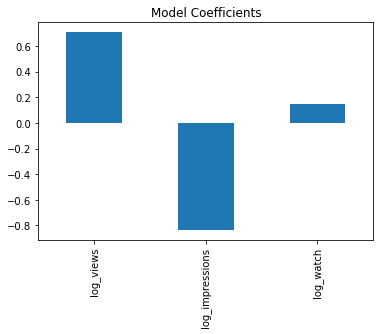

In [207]:
coef = pd.Series(lasso_best.coef_,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')

In [211]:
coef

log_views          0.706418
log_impressions   -0.834698
log_watch          0.149826
dtype: float64

In [230]:
X

,log_views,log_impressions,log_watch
0,14.041497,17.092610,11.095145
1,7.736744,12.145887,5.299799
2,9.968807,12.999821,8.212660
3,10.811020,13.163860,7.672437
4,9.505172,12.259026,6.941572
...,...,...,...
218,6.885510,10.173591,4.035885
219,6.306275,9.988747,2.958819
220,6.580639,9.832797,3.115513
221,6.997596,10.452822,4.054153


In [233]:
y

0      1.144223
1     -0.328504
2      0.928219
3      1.388791
4      1.217876
         ...   
218    0.806476
219    0.476234
220    0.974560
221    0.688135
222    2.443216
Name: log_click, Length: 223, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                   random_state=0)

In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [236]:
lasso_best.fit(X_train, y_train)

Lasso(alpha=1e-10)

In [237]:
lasso_best.score(X_train, y_train)

0.8014842351572049

In [238]:
y_pred = lasso_best.predict(X_test)

In [239]:
import matplotlib.pyplot as plt

In [244]:
# membuat tabel prediksi
df_pred = pd.DataFrame(y_pred, columns=['Predictions']) 

df_pred.head()

,Predictions
0,1.607777
1,0.176787
2,0.630792
3,1.112508
4,0.397818


In [245]:
# mereset indeks dari y_test
y_test = y_test.reset_index(drop=True)
y_test

0     1.050822
1     0.343590
2     0.524729
3     1.075002
4     0.494696
5     0.131028
6     1.128171
7    -0.139262
8     0.157004
9     0.285179
10    0.678034
11    1.373716
12   -0.020203
13    0.993252
14    0.797507
15    1.774952
16    1.508512
17    0.587787
18    0.476234
19    1.717395
20    1.081805
21    2.128232
22    1.081805
23    0.867100
24    0.751416
25    1.388791
26    0.708036
27    1.061257
28   -0.040822
29    1.733424
30    1.968510
31    2.008214
32    0.867100
33    0.641854
34   -0.040822
35    0.524729
36    1.501853
37    0.173953
38    0.667829
39    1.646734
40    1.345472
41    1.515127
42    0.512824
43   -0.162519
44    0.657520
Name: log_click, dtype: float64

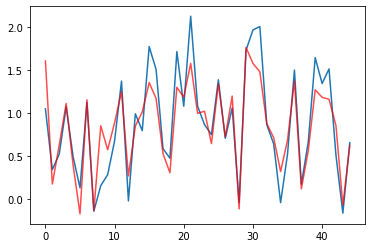

In [246]:
plt.plot(y_test)
plt.plot(y_pred, color='red', alpha=0.7)
plt.show()

sekian dan terima kasih, semoga bermanfaat  
*karena ini adalah tahap belajar, kekeliruan/perubahan bisa saja terjadi.*